In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
IMG_SIZE = (64, 64)
NUM_CLASSES = 43  # As per the GTSRB dataset
BATCH_SIZE = 32
EPOCHS = 15

1. Data Loading and Preprocessing

In [7]:
# 1. Load and preprocess training data
def load_data(csv_file):
    images = []
    labels = []
    for index, row in csv_file.iterrows():
        img_path = row['Path']  
        label = row['ClassId']  

        # Load and preprocess the image
        img = Image.open(img_path)
        img = img.resize(IMG_SIZE)  
        img = np.array(img) / 255.0  

        images.append(img)
        labels.append(label)

    return np.array(images), np.array(labels)

# Load the CSV files
train_csv = pd.read_csv('Train.csv') 
test_csv = pd.read_csv('Test.csv')   

# Load and preprocess images
train_images, train_labels = load_data(train_csv)
test_images, test_labels = load_data(test_csv)

In [17]:
# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, NUM_CLASSES)
val_labels = to_categorical(val_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)

2. Building the CNN Model

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # 43 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Training the Model

In [21]:
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 333s 413ms/step - accuracy: 0.2685 - loss: 2.7105 - val_accuracy: 0.7949 - val_loss: 0.8588
Epoch 2/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 282s 360ms/step - accuracy: 0.6487 - loss: 1.1068 - val_accuracy: 0.9109 - val_loss: 0.4162
Epoch 3/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 315s 350ms/step - accuracy: 0.7397 - loss: 0.7988 - val_accuracy: 0.9469 - val_loss: 0.2561
Epoch 4/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 285s 362ms/step - accuracy: 0.7924 - loss: 0.6296 - val_accuracy: 0.9554 - val_loss: 0.1974
Epoch 5/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 289s 368ms/step - accuracy: 0.8171 - loss: 0.5503 - val_accuracy: 0.9691 - val_loss: 0.1671
Epoch 6/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 290s 369ms/step - accuracy: 0.8400 - loss: 0.4704 - val_accuracy: 0.9735 - val_loss: 0.1249
Epoch 7/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 279s 355ms/step - accuracy: 0.8563 - loss: 0.4380 - val_accuracy: 0.9764 - val_loss: 0.1021
Epoch 8/15
785/785 ━━━━━━━━━━━━━━━━━━━━ 297s 378ms/step - accuracy: 0.8707 -

In [23]:
# Save the trained model
model.save('traffic_sign_model.h5')
print("Model training completed and saved as 'traffic_sign_model.h5'.")

Model training completed and saved as 'traffic_sign_model.h5'.


4. Evaluating the Model

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

395/395 - 36s - 91ms/step - accuracy: 0.9539 - loss: 0.1892
Test Accuracy: 95.39%
Test Loss: 0.1892


5. Plot Training and Validation Metrics (Accuracy and Loss)

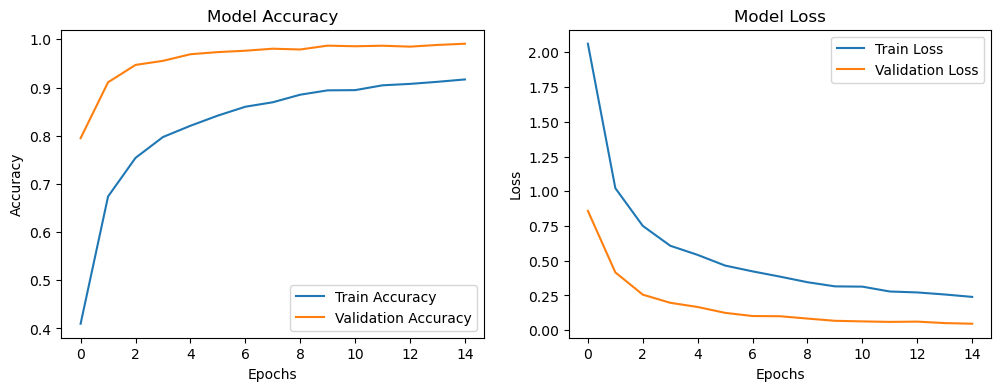

In [27]:
def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

6. Confusion Matrix and Classification Report

395/395 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        60
           1       0.96      0.96      0.96       720
           2       0.91      0.98      0.95       750
           3       0.95      0.92      0.94       450
           4       0.99      0.96      0.97       660
           5       0.87      0.95      0.91       630
           6       1.00      0.87      0.93       150
           7       0.97      0.92      0.94       450
           8       0.94      0.91      0.93       450
           9       0.97      0.98      0.98       480
          10       0.99      0.98      0.98       660
          11       0.86      0.98      0.91       420
          12       0.99      0.99      0.99       690
          13       0.97      1.00      0.98       720
          14       1.00      1.00      1.00       270
          15       0.98      0.99      0.98       210
          16   

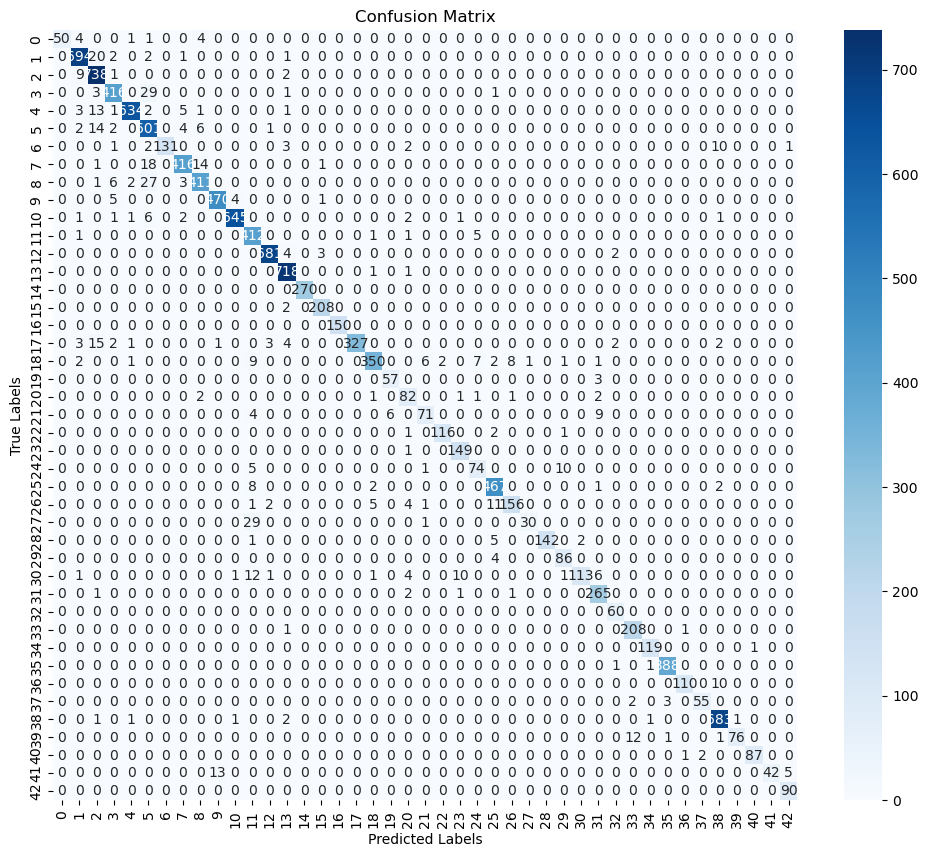

In [31]:
# Predict the test labels
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(NUM_CLASSES)]))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(NUM_CLASSES)], yticklabels=[str(i) for i in range(NUM_CLASSES)])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [35]:
model.save('traffic_sign_model.h5')
print("Model training completed and saved as 'traffic_sign_model.h5'.")

Model training completed and saved as 'traffic_sign_model.h5'.
